In [1]:
!pip install kaggle

In [3]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
100% 163M/163M [00:08<00:00, 22.6MB/s]
100% 163M/163M [00:08<00:00, 19.9MB/s]


In [4]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [5]:
!ls

data  face-mask-dataset.zip  sample_data


In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [7]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_846.jpg', 'with_mask_2934.jpg', 'with_mask_2307.jpg', 'with_mask_3653.jpg', 'with_mask_1208.jpg']
['with_mask_3189.jpg', 'with_mask_2390.jpg', 'with_mask_2738.jpg', 'with_mask_750.jpg', 'with_mask_3051.jpg']


In [8]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_569.jpg', 'without_mask_997.jpg', 'without_mask_2648.jpg', 'without_mask_1823.jpg', 'without_mask_391.jpg']
['without_mask_3759.jpg', 'without_mask_3264.jpg', 'without_mask_1421.jpg', 'without_mask_1636.jpg', 'without_mask_3199.jpg']


In [9]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


In [10]:
# create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [11]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [12]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [13]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [14]:
# convert images to numpy arrays+

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [15]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [17]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [18]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [19]:
from tensorflow import keras
import numpy as np
import cv2

num_of_classes = 2  # Two classes: masked and unmasked

model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(256,256,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(num_of_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

# Resize your training and testing images to 256x256
X_train_resized = np.array([cv2.resize(img, (256, 256)) for img in X_train])
X_test_resized = np.array([cv2.resize(img, (256, 256)) for img in X_test])

# Train the model
history = model.fit(X_train_resized, Y_train, validation_split=0.1, epochs=20)

# Save the trained model
model.save('mask_classification_model.h5')
from tensorflow import keras
import numpy as np
import cv2

# Define and train the model
num_of_classes = 2  # Two classes: masked and unmasked

model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(256,256,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(num_of_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

# Resize your training and testing images to 256x256
X_train_resized = np.array([cv2.resize(img, (256, 256)) for img in X_train])
X_test_resized = np.array([cv2.resize(img, (256, 256)) for img in X_test])

# Train the model
history = model.fit(X_train_resized, Y_train, validation_split=0.1, epochs=20)

# Save the trained model
model.save('mask_classification_model.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 34s 137ms/step - acc: 0.5375 - loss: 24.9958 - val_acc: 0.6397 - val_loss: 0.6599
Epoch 2/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 10s 56ms/step - acc: 0.6200 - loss: 0.6718 - val_acc: 0.7488 - val_loss: 0.5414
Epoch 3/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 10s 56ms/step - acc: 0.6206 - loss: 0.6733 - val_acc: 0.6843 - val_loss: 0.6387
Epoch 4/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 10s 57ms/step - acc: 0.7234 - loss: 0.5700 - val_acc: 0.6744 - val_loss: 0.6322
Epoch 5/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 10s 57ms/step - acc: 0.7289 - loss: 0.5547 - val_acc: 0.5934 - val_loss: 0.6614
Epoch 6/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 10s 57ms/step - acc: 0.6517 - loss: 0.6225 - val_acc: 0.6595 - val_loss: 0.6624
Epoch 7/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 10s 58ms/step - acc: 0.7055 - loss: 0.5798 - val_acc: 0.6876 - val_loss: 0.6291
Epoch 8/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 10s 58ms/step - acc: 0.7815 - loss: 0.5173 - val_acc: 0.7372 - val_loss: 0.6496
Epoch 9/20
170/170 ━━━━━━━━━━━━━━━━━━━

Epoch 1/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 18s 86ms/step - acc: 0.5460 - loss: 48.7525 - val_acc: 0.6281 - val_loss: 0.6732
Epoch 2/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 14s 58ms/step - acc: 0.6020 - loss: 0.6778 - val_acc: 0.5521 - val_loss: 0.6788
Epoch 3/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 10s 59ms/step - acc: 0.5781 - loss: 0.6801 - val_acc: 0.6182 - val_loss: 0.6624
Epoch 4/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 10s 59ms/step - acc: 0.6126 - loss: 0.6633 - val_acc: 0.6066 - val_loss: 0.6612
Epoch 5/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 10s 60ms/step - acc: 0.6194 - loss: 0.6407 - val_acc: 0.6446 - val_loss: 0.6387
Epoch 6/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 10s 57ms/step - acc: 0.6087 - loss: 0.6561 - val_acc: 0.6165 - val_loss: 0.6795
Epoch 7/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 10s 58ms/step - acc: 0.5941 - loss: 0.6704 - val_acc: 0.5157 - val_loss: 0.6750
Epoch 8/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 10s 58ms/step - acc: 0.5702 - loss: 0.6735 - val_acc: 0.5554 - val_loss: 0.6842
Epoch 9/20
170/170 ━━━━━━━━━━━━━━━━━━━━

Path of the image to be predicted: /content/Screenshot 2024-12-26 144204.png


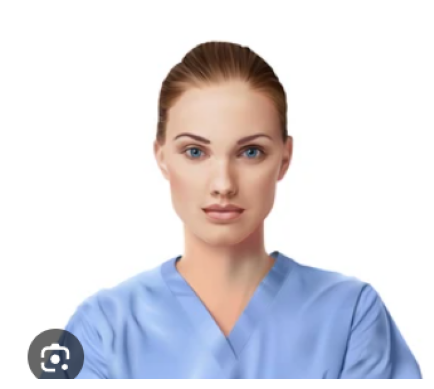

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step
The person in the image is not wearing a mask.


In [21]:
import cv2
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
from collections import Counter

# Load the pre-trained model
model = keras.models.load_model('mask_classification_model.h5')

# Load and display the large input image
input_image_path = input('Path of the image to be predicted: ')
input_image = cv2.imread(input_image_path)
input_image_rgb = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)
plt.imshow(input_image_rgb)
plt.axis('off')
plt.show()

# Parameters for sliding window
patch_size = 256
step_size = 128
patch_predictions = []

# Apply sliding window approach for predictions on each patch
for y in range(0, input_image.shape[0] - patch_size + 1, step_size):
    for x in range(0, input_image.shape[1] - patch_size + 1, step_size):
        patch = input_image[y:y+patch_size, x:x+patch_size]
        patch_resized = patch / 255.0
        patch_reshaped = np.reshape(patch_resized, (1, patch_size, patch_size, 3))

        # Predict the patch
        patch_prediction = model.predict(patch_reshaped)
        patch_pred_label = np.argmax(patch_prediction, axis=1)[0]
        patch_predictions.append(patch_pred_label)

# Majority voting for final prediction
majority_label = Counter(patch_predictions).most_common(1)[0][0]
if majority_label == 1:
    print('The person in the image is wearing a mask.')
else:
    print('The person in the image is not wearing a mask.')
